In [1]:
from PIL import Image
import numpy as np
import sys
import os
import csv
import cv2
import tensorflow as tf


In [3]:
path ='D:\\Dataset\\archive\\dataset\\train'
myList= os.listdir(path)
print(myList)

['fifty', 'five', 'fivehundred', 'hundred', 'ten', 'thousand', 'twenty']


In [4]:
noofClasses=len(myList)
print(noofClasses)

7


In [5]:
paths = ['D:\\Dataset\\archive\\dataset\\train\\fifty',
         'D:\\Dataset\\archive\\dataset\\train\\five',
         'D:\\Dataset\\archive\\dataset\\train\\fivehundred',
         'D:\\Dataset\\archive\\dataset\\train\\hundred', 
         'D:\\Dataset\\archive\\dataset\\train\\ten',
         'D:\\Dataset\\archive\\dataset\\train\\thousand',
         'D:\\Dataset\\archive\\dataset\\train\\twenty']
images = []
classNo = []


In [ ]:
# for x in range (0, noofClasses):
#    PicList = os.listdir(paths[x])
        
#    for y in PicList:
#     Img = cv2.imread(paths[x]+"/"+y)
    
#     Img = cv2.resize(Img, (112,112))
#     images.append(Img)
#     classNo.append(x)
#    print (x)
           
           
# print(len(images))

In [ ]:
# images = np.array(images)
# classNo = np.array(classNo)


In [ ]:
# savepath1= 'D:\\Saved_new3\\image.npy'
# savepath2='D:\\Saved_new3\\classn.npy'
# np.save(savepath1,images)
# np.save(savepath2,classNo)

In [6]:
savepath1= 'D:\\Saved_new\\image.npy'
savepath2='D:\\Saved_new\\classn.npy'
images = np.load(savepath1, allow_pickle=True)
classNo=np.load(savepath2,allow_pickle=True)

In [7]:
print(images.shape)

(13948, 32, 32, 3)


In [8]:
testpaths = ['D:\\Dataset\\archive\\dataset\\valid\\fifty',
         'D:\\Dataset\\archive\\dataset\\valid\\five',
         'D:\\Dataset\\archive\\dataset\\valid\\fivehundred',
         'D:\\Dataset\\archive\\dataset\\valid\\hundred', 
         'D:\\Dataset\\archive\\dataset\\valid\\ten',
         'D:\\Dataset\\archive\\dataset\\valid\\thousand',
         'D:\\Dataset\\archive\\dataset\\valid\\twenty']
testimages = []
testclassNo = []


In [ ]:
# for x in range (0, noofClasses):
#    testPicList = os.listdir(testpaths[x])

#    for y in testPicList:
#        curImg = cv2.imread(testpaths[x]+"/"+y)
#        curImg = cv2.resize(curImg, (112,112))
#        testimages.append(curImg)
#        testclassNo.append(x)
#    print (x)
# print(len(testimages))

In [ ]:
# savepath3= 'D:\\Saved_new3\\testimage.npy'
# savepath4='D:\\Saved_new3\\testclass.npy'
# np.save(savepath3,testimages)
# np.save(savepath4,testclassNo)

In [9]:
savepath3= 'D:\\Saved\\testimage.npy'
savepath4='D:\\Saved\\testclass.npy'
testimages = np.load(savepath3, allow_pickle=True)
testclassNo=np.load(savepath4,allow_pickle=True)

In [10]:

testimages = np.array(testimages)
testclassNo = np.array(testclassNo)
#print(testimages[0])

print(testimages.shape)
print(testclassNo.shape)

(3334, 32, 32, 3)
(3334,)


In [11]:
#Splitting the data into training and validation
from sklearn.model_selection import train_test_split
validRatio = 0.25

In [12]:
X_test, y_test= testimages, testclassNo
print(X_test.shape)
print(y_test.shape)



(3334, 32, 32, 3)
(3334,)


In [13]:
X_train,X_valid, y_train,y_valid = train_test_split(images,classNo,test_size=validRatio)
print(X_train.shape)
print(X_valid.shape)
print(y_train.shape)
print(y_valid.shape)

(10461, 32, 32, 3)
(3487, 32, 32, 3)
(10461,)
(3487,)


In [14]:
numofSamples =[]
for x in range (0, noofClasses):
    #print(len(np.where(y_train==x)[0]))
    #print(len(np.where(y_test==x)[0]))
    #print(len(np.where(y_valid==x)[0]))
    numofSamples.append(len(np.where(y_train==x)[0]))
print(numofSamples)
#print(y_train)
#print(len(np.where(y_train==0)[0]))
#print(y_train[0])


[1576, 1310, 1514, 1494, 1497, 1500, 1570]


In [15]:
#plotting the sdistribution
import matplotlib.pyplot as plt

In [ ]:
plt.figure(figsize=(10,5))
plt.bar(range(0, noofClasses), numofSamples)
plt.title("No of images for each class")
plt.xlabel("Class ID")
plt.ylabel("No of Images")
plt.show()

In [16]:
#PreProcessing Function
def preProcessing(img):
    img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img=cv2.equalizeHist(img)
    img=img/255
    return img


In [17]:
# # #img= X_train[0]
# # #img=cv2.resize(img,(300,300))
# # #cv2.imshow("Preprocessed",img)
# # #cv2.waitKey(0)
X_train= np.array(list(map(preProcessing, X_train)))
X_test= np.array(list(map(preProcessing, X_test)))
X_valid= np.array(list(map(preProcessing, X_valid)))


In [18]:

X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],X_train.shape[2],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],X_test.shape[2],1)
X_valid = X_valid.reshape(X_valid.shape[0],X_valid.shape[1],X_valid.shape[2],1)
print(X_train.shape)
print(X_test.shape)
print(y_valid.shape)

(10461, 32, 32, 1)
(3334, 32, 32, 1)
(3487,)


In [19]:
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D,Dropout
from keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import BatchNormalization
from keras.callbacks import EarlyStopping

In [ ]:
# dataGen = ImageDataGenerator(width_shift_range=0.1,
#                             height_shift_range=0.1,
#                             zoom_range=0.2,
#                             shear_range=0.1,
#                             rotation_range=10)
# # dataGen.fit(X_train)

In [20]:
#OneHotEncoding
from keras.utils.np_utils import to_categorical

In [ ]:
#print(y_train)
print(y_train.shape)


In [21]:
y_train= to_categorical(y_train, noofClasses)
y_test= to_categorical(y_test, noofClasses)
y_valid= to_categorical(y_valid, noofClasses)

In [ ]:
print(y_train[0])
print(y_valid.shape)

In [22]:
def myModel():
    sizeOfFilter1=(5,5)
    sizeOfFilter2=(3,3)
    sizeOfPool=(2,2)
    model=Sequential()
    model.add((Conv2D(32,sizeOfFilter2,input_shape=(32,32,1),activation='relu',padding='same')))
    model.add((Conv2D(32,sizeOfFilter2,activation='relu',padding='same')))
    model.add((BatchNormalization()))
    model.add((Conv2D(64,sizeOfFilter2,activation='relu',padding='same')))
    model.add((Conv2D(64,sizeOfFilter2,activation='relu',padding='same')))
    model.add((BatchNormalization()))
    model.add((MaxPooling2D()))
    model.add((Dropout(.2)))

    model.add((Conv2D(64,sizeOfFilter2,activation='relu',padding='same')))
    model.add((Conv2D(64,sizeOfFilter2,activation='relu',padding='same')))
    model.add((BatchNormalization()))
    model.add((Conv2D(128,sizeOfFilter2,activation='relu',padding='same')))
    model.add((Conv2D(128,sizeOfFilter2,activation='relu',padding='same')))
    model.add((BatchNormalization()))
    model.add((MaxPooling2D()))
    model.add((Dropout(.2)))

    model.add((Conv2D(64,sizeOfFilter2,activation='relu',padding='same')))
    model.add((BatchNormalization()))
    model.add((Conv2D(32,sizeOfFilter2,activation='relu',padding='same')))
    model.add((MaxPooling2D()))

    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(7, activation='softmax'))
    model.compile(Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])
    return model

In [23]:
model1= myModel()
print(model1.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 64)       256       
 hNormalization)                                        

In [ ]:
batchSizeVal=16
epochsVal=20
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

In [24]:
model1= keras.models.load_model("first.h5")

In [ ]:

history= model1.fit(X_train,y_train,epochs=epochsVal,batch_size = batchSizeVal,
             validation_data= (X_valid, y_valid))

In [25]:
accuracy,loss= model1.evaluate(X_test,y_test)
score=model1.evaluate(X_test,y_test)

105/105 [==============================] - 1s 8ms/step - loss: 2.2964 - accuracy: 0.4601


In [ ]:
print(accuracy)

In [ ]:
model1.save("first.h5")

In [ ]:
# testimages=[]
# testClassNo=[]
# test_path="C:\\Users\\Dell\\Desktop\\Minor\\test"
# nooftest=len(os.listdir(test_path))
# print(os.listdir(test_path))
# for x in range (0, nooftest):
#    myPicList = os.listdir(test_path)
#    for y in myPicList:
#        curImg = cv2.imread(test_path+"/"+y)
#        curImg = cv2.resize(curImg, (32,32))
#        plt.imshow(curImg)

#        testimages.append(curImg)
#        testClassNo.append(x)
# testimages= np.array(testimages)
# testClassNo=np.array(testClassNo)
# print (testimages.shape)

In [ ]:
# testimages= preProcessing(testimages[0])
# plt.imshow(testimages)
# testimages= testimages.reshape(1,testimages.shape[0],testimages.shape[1],1)

# predictions= testmodel.predict(testimages)
# print(predictions)
# probvalue= np.argmax(predictions)
# print (probvalue)

In [ ]:
plt.figure(1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('Loss')
plt.xlabel('epoch')
plt.figure(2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Accuracy')
plt.xlabel('epoch')
plt.show()
print('Test Score =',loss)
print('Test Accuracy =',accuracy)

In [26]:
import pandas as pd
import seaborn as sn
from sklearn.metrics import confusion_matrix

In [27]:
print(X_test.shape)
cm_class=[50,5,500,100,10,1000,20]


(3334, 32, 32, 1)


In [28]:
predictions=model1.predict(X_test)

In [29]:
print(predictions[0])

[1.1768008e-02 9.9268429e-02 6.3758738e-02 6.3091479e-03 1.1170924e-01
 7.0679802e-01 3.8853133e-04]


In [30]:
rounded_predictions = np.argmax(predictions, axis=-1)

In [31]:
#rounded_predictions=to_categorical(predictions,noofClasses)

In [32]:
for i in rounded_predictions:
    print (i)

5
0
0
0
0
0
0
0
0
0
3
0
0
0
5
2
0
5
1
6
6
0
6
0
0
6
3
0
0
6
5
6
6
6
0
6
6
0
3
6
5
0
4
6
6
0
0
6
4
6
0
3
0
4
3
3
0
0
3
3
3
0
3
3
3
3
3
0
3
0
3
3
3
3
0
3
3
0
0
3
3
0
0
0
0
1
3
3
3
0
0
3
3
3
3
3
3
3
0
3
0
3
0
3
3
3
3
3
3
3
3
0
0
0
0
3
0
0
0
6
0
3
0
0
0
0
0
6
0
0
0
0
3
3
0
1
0
0
3
0
3
3
6
0
3
0
0
4
3
4
0
0
0
3
0
0
5
3
3
5
5
5
5
5
2
5
5
0
5
4
4
5
5
4
4
5
5
4
0
0
5
4
0
6
0
4
5
0
0
0
3
5
0
0
3
4
5
6
6
5
0
6
4
0
0
5
5
5
0
4
4
0
4
1
4
6
5
5
4
5
0
5
0
0
1
5
5
1
0
5
5
1
5
3
0
3
3
3
3
3
3
6
5
0
5
0
3
3
6
3
0
5
6
0
3
3
0
6
3
3
0
2
3
3
3
3
3
0
3
3
3
2
3
3
3
2
3
3
6
0
6
3
6
6
3
3
5
3
5
1
0
3
5
3
6
1
0
3
5
6
1
6
3
4
0
1
5
1
4
3
6
0
5
0
3
6
0
0
6
0
3
2
0
3
3
6
5
0
6
3
5
0
3
0
0
3
3
4
3
2
3
3
6
3
2
0
3
5
3
3
3
3
3
1
1
3
0
0
3
3
0
6
3
0
6
0
4
0
3
0
4
3
0
0
3
6
6
6
0
6
6
3
3
6
6
6
5
0
1
1
0
5
3
3
6
0
3
3
3
3
0
3
2
5
3
2
0
6
6
3
0
0
6
0
4
6
3
6
3
3
3
3
0
3
4
3
3
3
5
3
3
0
2
0
3
5
3
0
3
3
0
0
3
4
0
0
0
3
3
3
0
4
3
6
3
6
0
2
5
2
3
3
3
0
0
0
0
0
3
3
0
0
0
0
0
1
3
3
0
0
0
0
0
0
0
0
0
0
0
3
3
0
3
0
0
0
0
0
0
3


In [33]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt


In [34]:
for i in testclassNo:
    print(i)

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [35]:
cm = confusion_matrix(y_true=testclassNo, y_pred=rounded_predictions)

In [36]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
   
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [37]:
cm_plot_labels=[50,5,500,100,10,1000,20]

Confusion matrix, without normalization
[[176  17  14 168  29  53  58]
 [ 17 248  77   6  23  84  46]
 [ 24  45 286  11  57  61  17]
 [ 79   8  16 261  28  30  99]
 [ 57  21  35  61 204  37  30]
 [ 37  31  33  31  45 258  66]
 [ 68   9   9 111  31  21 101]]


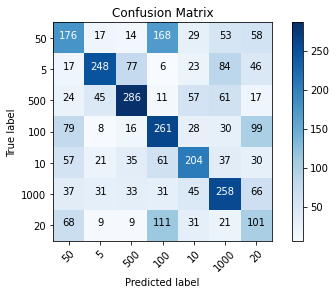

In [38]:
plot_confusion_matrix(cm=cm,classes=cm_plot_labels,title='Confusion Matrix')

In [39]:
from sklearn.metrics import classification_report
print(classification_report(testclassNo,rounded_predictions))

              precision    recall  f1-score   support

           0       0.38      0.34      0.36       515
           1       0.65      0.50      0.56       501
           2       0.61      0.57      0.59       501
           3       0.40      0.50      0.45       521
           4       0.49      0.46      0.47       445
           5       0.47      0.51      0.49       501
           6       0.24      0.29      0.26       350

    accuracy                           0.46      3334
   macro avg       0.46      0.45      0.46      3334
weighted avg       0.47      0.46      0.46      3334

